In [32]:
## parameters  key and bpm have a least 20% infulence over the songs streams
# predict key and bpm regargding all the other parameters
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from datetime import date
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVR
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("MAIN_DATASET_spotify2023.csv")

data.head()
encoder = LabelEncoder()
data["key"] = encoder.fit_transform(data["key"])
data["mode"] = encoder.fit_transform(data["mode"])
released_day_of_year = []

for i in range(len(data.index)):
    day_of_year = date(data['released_year'][i],
                    data['released_month'][i],
                    data['released_day'][i]).timetuple().tm_yday
    released_day_of_year.append(day_of_year)

# add new series to dataframe
data.insert(len(data.columns), "released_day_of_year", released_day_of_year, True)

data = data[["released_day_of_year", "streams",'bpm','key', 'mode', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

data["streams"] = data["streams"] / 1000000
#data_standarized
data

#without key and bpm
data_sorted = data.sort_values(by = "streams", ascending = False).reset_index(drop=True)
data_sorted

,released_day_of_year,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,333,3703.895074,171,3,0,50,38,80,0,0,9,7
1,6,3562.543890,96,3,1,83,93,65,58,0,9,8
2,312,2887.241814,110,3,0,50,45,41,75,0,11,3
3,130,2864.791672,98,8,1,82,54,59,69,0,18,10
4,282,2808.096550,90,4,0,76,91,50,54,0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...
947,195,14.780425,140,3,0,56,48,73,0,0,35,4
948,152,11.956641,133,2,1,93,68,65,42,0,12,25
949,194,11.599388,97,11,0,79,92,89,5,0,6,5
950,356,1.365184,105,9,0,82,62,74,10,0,33,7


In [5]:
X = data.drop("streams", axis = 1)
y = data["streams"]

X_train, X_help, y_train, y_help = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_help, y_help, test_size=0.5, random_state=42)


val_percent = (len(X_val)/(len(data)))*100
test_percent = (len(X_test)/(len(data)))*100
train_percent = (len(X_train)/(len(data)))*100
print(f"Percent of Train: {train_percent:.2f} ,Validation:{val_percent:.2f} and Test dataset:{test_percent:.2f} ")


Percent of Train: 59.98 ,Validation:19.96 and Test dataset:20.06 


## Task 1,2

In [7]:
reg = LinearRegression()
weights_train = np.ones_like(y_train)
np.random.seed(42)
random_weights = np.random.rand(len(y_train))

reg.fit(X_train, y_train, sample_weight=weights_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)

cv_values = [3,5,10]
for k in cv_values:
    scores = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation: {-mean_cross}")

rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
mean_val = mean_squared_error(y_val, y_pred)

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse: {rmse}, Mean:  {mean}")

mean of 3-folds cross_validation: 566.9815035448402
mean of 5-folds cross_validation: 566.2653889253404
mean of 10-folds cross_validation: 562.3635316619909

Rmse_val: 575.5424132710563, Mean_val:  331249.0694738714
Rmse: 553.6714135282607, Mean:  306552.0341583822


##  Task3 neural regresor

In [8]:


reg = MLPRegressor(hidden_layer_sizes=(5, 6, 5), random_state=50, max_iter=50, solver='lbfgs')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)
cv_values = [3,5,10]
for k in cv_values:
    scores = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation: {-mean_cross}")
    
rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
mean_val = mean_squared_error(y_val, y_pred)

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse: {rmse}, Mean:  {mean}")

mean of 3-folds cross_validation: 545.4039277918322
mean of 5-folds cross_validation: 544.7597896135285
mean of 10-folds cross_validation: 547.1441057581424

Rmse_val: 605.6837584187814, Mean_val:  366852.8152123008
Rmse: 532.8758345196298, Mean:  283956.655014992


## Grid Search

In [81]:



parameters = {'max_iter' : [50,100,150,400,800],'solver':('lbfgs', 'sgd', 'adam'), 'hidden_layer_sizes':[(10, 5, 5), (5, 10, 5), (5, 5, 10),(5,5), (5,10)], "random_state" :[50,100,150,200]}
#parameters = {'solver':('lbfgs', 'sgd', 'adam'),  "random_state" :[50]}
grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_)
print(grid_search.best_score_)# to get the best estimator
#print(grid_search.cv_results_) # to get all results



{'hidden_layer_sizes': (5, 5, 10), 'max_iter': 50, 'random_state': 50, 'solver': 'lbfgs'}
MLPRegressor(hidden_layer_sizes=(5, 5, 10), max_iter=50, random_state=50,
             solver='lbfgs')
-545.0856128547363
mean of 3-folds cross_validation: 545.40375172399
mean of 5-folds cross_validation: 544.7605293726463
mean of 10-folds cross_validation: 547.286325405132
Rmse_val: 605.6835824302068, Mean_val:  366852.6020254891
Rmse: 532.875832520892, Mean:  283956.65288483375


## Random Search

In [99]:

logistic = MLPRegressor(hidden_layer_sizes=(5, 5, 10), random_state=50, max_iter = 50 )
distributions = dict(alpha=uniform(loc=0, scale=8), solver =['lbfgs', 'sgd', 'adam'])
Random_search = RandomizedSearchCV(logistic, distributions, random_state=0, scoring='neg_root_mean_squared_error')
Random_search.fit(X_train, y_train)
print(Random_search.best_params_) # to get the best parameters
print(Random_search.best_estimator_)
print(Random_search.best_score_)

{'alpha': 11.68863010829902, 'solver': 'lbfgs'}
MLPRegressor(alpha=11.68863010829902, hidden_layer_sizes=(5, 5, 10),
             max_iter=50, random_state=50, solver='lbfgs')
-548.0950996073697


## Task 4  Polynomial reggresor

In [64]:
# Create polynomial features
poly_features = PolynomialFeatures(degree = 2) #4 poziom najlepszy
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.fit_transform(X_val)

reg = LinearRegression()
reg.fit(X_train_poly, y_train)

y_pred_train = reg.predict(X_train_poly)
y_pred = reg.predict(X_val_poly)

rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
mean_val = mean_squared_error(y_val, y_pred)

cv_values = [3,5,10]
for k in cv_values:
    scores_val_score = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores_val_score.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation: {-mean_cross}")

    
scores = cross_validate(reg, X_train, y_train, cv=5,scoring=['r2','neg_mean_absolute_error'])
print(f"\nr2: {scores['test_r2'].mean()}")
print(f"mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")
#print(scores['fit_time'])
#print(scores['score_time'])


rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)

print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse: {rmse}, Mean:  {mean}")


mean of 3-folds cross_validation: 566.9815035448402
mean of 5-folds cross_validation: 566.2653889253404
mean of 10-folds cross_validation: 562.3635316619909

r2: -0.010635136469239215
mean_abs_error: -416.8067776738637

Rmse_val: 641.4420043292483, Mean_val:  411447.8449179234
Rmse: 523.1976987026036, Mean:  273735.8319277004


## SVM 

In [30]:

# Kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} 
#linear the best but the longest so most complicated

reg = SVR(C=2, epsilon=0.2, kernel='poly', max_iter=50)
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)

rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
mean_val = mean_squared_error(y_val, y_pred)

cv_values = [3,5,10]
for k in cv_values:
    scores_val_score = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores_val_score.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation rmse: {-mean_cross}")

scores = cross_validate(reg, X_train, y_train, cv=5,scoring=['r2','neg_mean_absolute_error'])

print(f"\nr2: {scores['test_r2'].mean()}")
print(f"mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")



rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)

print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse: {rmse}, Mean:  {mean}")

mae = mean_absolute_error(y_val, y_pred)
print("\nMean Absolute Error:", mae)



mean of 3-folds cross_validation rmse: 564.6864238693207
mean of 5-folds cross_validation rmse: 575.969306091952
mean of 10-folds cross_validation rmse: 580.5646911727437

r2: -0.04587797405186711
mean_abs_error: -464.2931628617016

Rmse_val: 612.8301832705566, Mean_val:  375560.83352742397
Rmse: 592.2982685857339, Mean:  350817.23896965815

Mean Absolute Error: 512.9533244591329


In [104]:
#GridSearch
parameters = {'max_iter' : [50,100,150,400,800],'kernel':('linear', 'poly', 'rbf', 'sigmoid')}
#parameters = {'solver':('lbfgs', 'sgd', 'adam'),  "random_state" :[50]}
grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_)
print(grid_search.best_score_)# to get the best estimator
#print(grid_search.cv_results_) # to get all results


{'kernel': 'poly', 'max_iter': 50}
SVR(C=2, epsilon=0.2, kernel='poly', max_iter=50)
-575.969306091952


In [117]:
#RandomSearch
logistic = SVR( epsilon=0.2, kernel='poly', max_iter=-1, degree = 2)
distributions = dict(C=uniform(loc=0, scale=10), coef0 =uniform(loc=0, scale=10), epsilon= uniform(loc=0, scale=10))
Random_search = RandomizedSearchCV(logistic, distributions, random_state=0, scoring='neg_root_mean_squared_error')
Random_search.fit(X_train, y_train)
print(Random_search.best_params_) # to get the best parameters
print(Random_search.best_estimator_)
print(Random_search.best_score_)

{'C': 7.781567509498505, 'coef0': 8.700121482468191, 'epsilon': 9.78618342232764}
SVR(C=7.781567509498505, coef0=8.700121482468191, degree=2,
    epsilon=9.78618342232764, kernel='poly')
-605.0320711732218


## SVM model with best  parameters

In [47]:
reg = SVR(C=2, epsilon=0.2, kernel='poly', max_iter=50)
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("\nR2:", r2)


Mean Absolute Error: 480.52269292633395

R2: -0.09984576866202488


# Final Assessment of the model

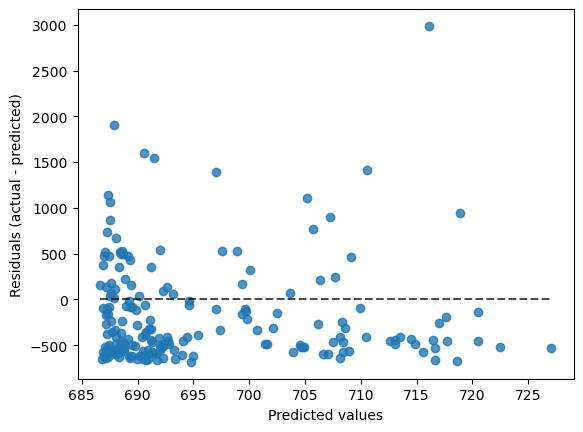

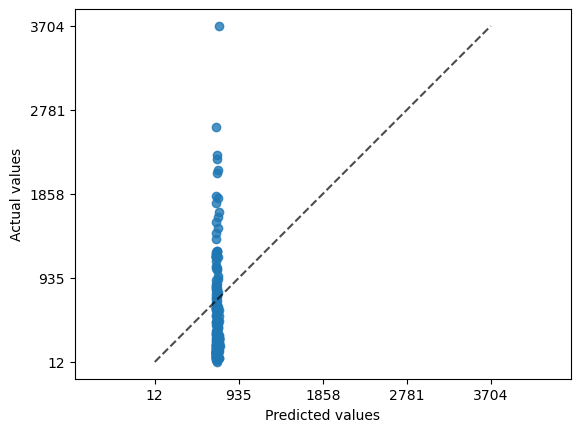

In [46]:
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import confusion_matrix
PredictionErrorDisplay.from_estimator(reg, X_test, y_test,
kind="residual_vs_predicted")
PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred,
kind="actual_vs_predicted")


## Pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
clf_mlp1 = Pipeline([("scaler", StandardScaler()), ("mlp", MLPClassifier(max_iter=5000, random_state=1, solver='adam', alpha =0.0001))])
clf_mlp1.fit(X_train, y_train)

y_pred_train = clf_mlp1.predict(X_train)
y_pred = clf_mlp1.predict(X_val)


acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)
print(f"Accuracy train: {acc_train}, accuracy validation: {acc_val}")


Accuracy train: 0.9803395889186773, accuracy validation: 0.6448598130841121
